In [27]:
""" This is the main script for eap ml project, which plays with all ml methods, applicable for cpcrsp analysis
Created on Sat Feb 12 15:19:54 2022
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, time
import warnings
import random
import gc
import dill
import statsmodels.api as sm
from sklearn.svm import SVR
from tensorflow.keras.callbacks import EarlyStopping
from random import sample


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV
from sklearn import svm
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

plt.style.use('seaborn-white')
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', 40)
gc.enable()

In [28]:
path = '../input/mleap-data/'

s_train_X = pd.read_csv(path + 's_train_X.csv')
s_train_y = pd.read_csv(path + 's_train_y.csv')
s_test_X = pd.read_csv(path + 's_test_X.csv')
s_test_y = pd.read_csv(path + 's_test_y.csv')

s_train_X.drop(columns='Unnamed: 0', inplace=True)
s_train_y.drop(columns='Unnamed: 0', inplace=True)
s_test_X.drop(columns='Unnamed: 0', inplace=True)

#s_train_X = np.array(s_train_X)
#s_train_y = np.array(s_train_y)
#s_test_X = np.array(s_test_X)
#s_test_y = np.array(s_test_y)

print(s_train_X.shape)
print(s_train_y.shape)
print(s_test_X.shape)
print(s_test_y.shape)

(1257579, 27)
(1257579, 1)
(100000, 27)
(100000, 1)


In [29]:
sm_train_X = s_train_X.sample(50000)
print(sm_train_X.shape)

(50000, 27)


In [30]:
rand_index = sample(list(s_train_X.index), 50000)
sm_train_X = s_train_X.loc[rand_index]
sm_train_y = s_train_y.loc[rand_index]

In [38]:
model_ann5_s = Sequential([
    BatchNormalization(input_shape=(27,)),
    Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    Dropout(0.4),
    BatchNormalization(),
    Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    Dropout(0.4),
    BatchNormalization(),
    Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    Dropout(0.4),
    BatchNormalization(),
    Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    Dropout(0.4),
    BatchNormalization(),
    Dense(16, activation=tf.keras.layers.LeakyReLU(alpha=0.1)),
    Dropout(0.4),
    Dense(1)])

print(model_ann5_s.count_params())

# here is cutoff. going wider/deeper does not seem to help...
# run this model with 50-100 epochs for all subsamples

118093


Epoch 1/30
77/77 - 2s - loss: 0.9710 - mean_squared_error: 0.9710 - val_loss: 1.1169 - val_mean_squared_error: 1.1169
Epoch 2/30
77/77 - 1s - loss: 0.9711 - mean_squared_error: 0.9711 - val_loss: 1.1158 - val_mean_squared_error: 1.1158
Epoch 3/30
77/77 - 1s - loss: 0.9709 - mean_squared_error: 0.9709 - val_loss: 1.1173 - val_mean_squared_error: 1.1173
Epoch 4/30
77/77 - 1s - loss: 0.9705 - mean_squared_error: 0.9705 - val_loss: 1.1167 - val_mean_squared_error: 1.1167
Epoch 5/30
77/77 - 1s - loss: 0.9712 - mean_squared_error: 0.9712 - val_loss: 1.1164 - val_mean_squared_error: 1.1164
Epoch 6/30
77/77 - 1s - loss: 0.9709 - mean_squared_error: 0.9709 - val_loss: 1.1171 - val_mean_squared_error: 1.1171
Epoch 7/30
77/77 - 1s - loss: 0.9708 - mean_squared_error: 0.9708 - val_loss: 1.1170 - val_mean_squared_error: 1.1170
Epoch 8/30
77/77 - 1s - loss: 0.9707 - mean_squared_error: 0.9707 - val_loss: 1.1169 - val_mean_squared_error: 1.1169
Epoch 9/30
77/77 - 1s - loss: 0.9711 - mean_squared_erro

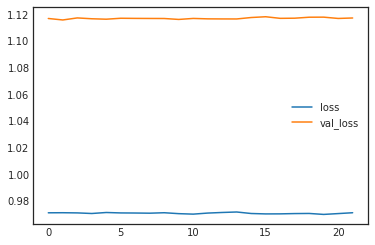

In [53]:
early_stopping20 = EarlyStopping(patience=20)
early_stopping30 = EarlyStopping(patience=30)
time1 = time.time()
model_ann5_s.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model_ann5_s.fit(s_train_X, s_train_y, validation_data=(s_test_X, s_test_y), 
                         batch_size=65536, epochs=30, verbose=2, callbacks=[early_stopping20])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

#ann_s = [r2_score(s_train_y, model_ann5_s.predict(s_train_X)), 
#       r2_score(s_test_y, model_ann5_s.predict(s_test_X))]
print(time.time()-time1)

In [ ]:
model_ann5_sp.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model_ann5_sp.fit(sp_train_X, s_train_y, validation_data=(sp_test_X, s_test_y), 
                         batch_size=512, epochs=80, verbose=2, callbacks=[early_stopping15])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

ann_sp = [r2_score(s_train_y, model_ann5_sp.predict(sp_train_X)), 
       r2_score(s_test_y, model_ann5_sp.predict(sp_test_X))]

model_ann5_lp.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
history = model_ann5_lp.fit(lp_train_X, s_train_y, validation_data=(lp_test_X, s_test_y), 
                         batch_size=512, epochs=80, verbose=2, callbacks=[early_stopping15])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

ann_lp = [r2_score(s_train_y, model_ann5_lp.predict(lp_train_X)), 
       r2_score(s_test_y, model_ann5_lp.predict(lp_test_X))]

In [ ]:
ann_results = ann_s + ann_sp + ann_lp

ann_results

In [ ]:
import pickle

with open("ann_results_2", "wb") as fp:   #Pickling
    pickle.dump(ann_results, fp)

In [ ]:
temp = pd.DataFrame(ann_results)
temp.to_csv('ann_results_2.csv')

In [ ]:
# import the modules we'll need
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [ ]:
create_download_link(temp)
